## 課題：クラウドファンディングが成功するか(state)を予測

Project: [Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects)  
名前: 浦上暉允



## 目次

1. データセットの確認 
    * 1-1. データの項目確認  
    * 1-2. データ表示  
    * 1-3．欠損値確認  
    * 1-4. 知り得ないデータの除外
    * 1-5. 不要な変数の削除1
    * 1-6. 目的変数について
2. クロス集計とデータの外観
    * 2-1. countryとstate
    * 2-2. currencyとstate
    * 2-3. main_categoryとstate
    * 2-4. 不要な変数の削除2
    * 2-5. usd_goal_realの外観
    * 2-6. 日時データの外観
3. 前処理
    * 3-1. 目的変数(state)の処理
    * 3-2. トレーニングデータとテストデータに分割(8:2)
    * 3-3. usd_goal_realの前処理
    * 3-4. ダミー変数への変換
4. 標準化と相関
    * 4-1. 標準化
    * 4-2. 相関係数
5. 特徴量選択
    * 5-1. Lasso
    * 5-2. Boruta(Random Forest + t-test)
    * 5-3. PCA
6. 機械学習モデルの検証
    * 6-1. Logistic regression
        * 6-1-1. Lasso
        * 6-1-2. Boruta
        * 6-1-3. PCA
    * 6-2. Random Forest
        * 6-2-1. Lasso
        * 6-2-2. Boruta
        * 6-2-3. PCA
    * 6-3. AdaBoost
        * 6-3-1. Lasso
        * 6-3-2. Boruta
        * 6-3-3. PCA
7. まとめ
8. 考察
9. 参考文献

## 1.データセットの確認

### 1-1. データの項目確認
* state(プロジェクトの現在の状況)が目的変数

 | Column | Detail | Detail(日本語訳) 
 | :---: | :---: | :---: 
 | ID |internal kickstarter id |個別ID
 | name |name of project|プロジェクト名
 | category |category|カテゴリー|
 | main_category |category of campaign|大まかなカテゴリー
 | currency |currency used to support|通貨|
 | deadline |deadline for crowdfunding|クラウドファンディングの締め切り日
 | goal |fundraising goal |目標調達金額
 | launched |date launched|開始日
 | pledged |amount pledged by "crowd" |調達金額
 | state |Current condition the project is in |プロジェクトの現在の状況（成功など）
 | backers |number of backers |支援者の
 | country |country pledged from |国
 | usd pledged |Pledged amount in USD |USD換算の調達金額
 | usd_pledged_real |Pledged amount in USD | USD換算の調達金額
 | usd_goal_real |Goal amount in USD |USD換算の目標調達金額

### 1-2. データ表示

In [1]:
# 必要なライブラリの読み込み
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# データ読み込み
df_data = pd.read_csv('../ks-projects-201801.csv/ks-projects-201801.csv')

In [3]:
df_data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


### 1-3．欠損値確認  

In [4]:
df_data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

* nameが4個、usd pledgeが3,797個欠損値がある.その他の変数には欠損値無し.

### 1-4. 知り得ないデータの除外

### 今回は<font color="Red">クラウドファンディングの成功（state）を事前に予測すること</font>を目的とするため、事前に知りえない情報 (pledged, backers, usd pledged, usd_pledged_real)は除外  

In [5]:
df_data_R1 = df_data.drop(['pledged','backers','usd pledged','usd_pledged_real'],axis=1)

In [6]:
# 事前に知りえない情報の除外後の欠損値の確認
df_data_R1.isnull().sum()

ID               0
name             4
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

### 1-5. 不要な変数の削除1
* **ID**:        それぞれ固有であり,つながり見つけること難しい
* **name**:      それぞれ固有であり,つながり見つけること難しい.また,カテゴリーがあるため
* **goal**:      既にusd_goal_realがあり、換算された値が存在するため

In [7]:
# category, main_categoryの種類
print("categoryの種類：{}".format(len(np.unique(df_data_R1.category))))
print("main_categoryの種類：{}".format(len(np.unique(df_data_R1.main_category))))

categoryの種類：159
main_categoryの種類：15


* **category**: 159種類と多い、またmain_category(15)があるため

In [8]:
df_data_R2 = df_data_R1.drop(['ID','name','goal','category'],axis=1)

In [9]:
# 不要な変数削除により欠損値確認
df_data_R2.isnull().sum()

main_category    0
currency         0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

* 1-4.と1-5.により欠損値無し.

In [10]:
# データの確認
df_data_R2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 7 columns):
main_category    378661 non-null object
currency         378661 non-null object
deadline         378661 non-null object
launched         378661 non-null object
state            378661 non-null object
country          378661 non-null object
usd_goal_real    378661 non-null float64
dtypes: float64(1), object(6)
memory usage: 20.2+ MB


### 1-6. 目的変数について

In [11]:
# 目的変数の種類
df_data_R2["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

* 成功と失敗の二つだけに絞る

In [12]:
#successfulとfailedのみ抽出
df_data_R2_success = df_data_R2[df_data_R2['state']=='successful']
df_data_R2_failed =  df_data_R2[df_data_R2['state']=='failed']
# 使わないsuccessfulを1にそれ以外を0に
#df_data_R2.loc[df_data_R2['state']=='successful','state'] = 1
#df_data_R2 = df_data_R2.replace({'state':{'failed':0,'canceled':0,'live':0,'suspended':0,'undefined':0}})
#結合
df_data_succ_fail = pd.concat([df_data_R2_success,df_data_R2_failed])

In [13]:
# データの中身確認
df_data_succ_fail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 5 to 378660
Data columns (total 7 columns):
main_category    331675 non-null object
currency         331675 non-null object
deadline         331675 non-null object
launched         331675 non-null object
state            331675 non-null object
country          331675 non-null object
usd_goal_real    331675 non-null float64
dtypes: float64(1), object(6)
memory usage: 20.2+ MB


## 2. クロス集計とデータの外観
stateとcountry,currency,main_categoryの間でクロス集計を行う  
左：クロス集計のヒートマップによる図示  
右：各変数内毎のカウントプロットを行い変数内の割合を図示

### 2-1. countryとstate

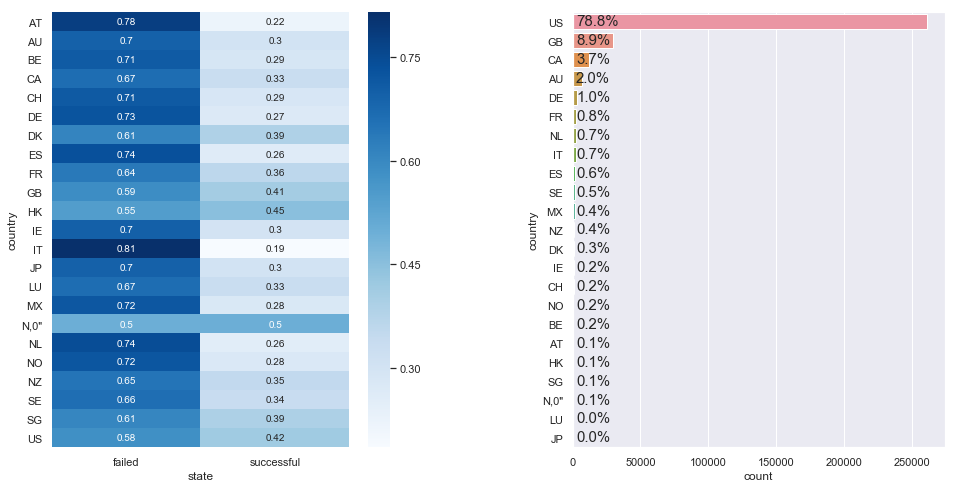

In [14]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# country内の構成割合
perc_country=df_data_succ_fail["country"].value_counts(normalize=True)

# クロス集計
cross_curr=pd.crosstab(index=df_data_succ_fail["country"],columns=df_data_succ_fail["state"],normalize='index')

# クロス集計の図示
sns.heatmap(cross_curr,annot=True,cmap="Blues",ax=ax[0])

# country別のカウントプロット
sns.countplot(y=df_data_succ_fail.country,
             order=df_data_succ_fail["country"].value_counts().index,
             ax=ax[1])

# 構成割合をグラフ上に表示
for x in range(0,len(perc_country)):
    plt.text(2500, x+0.2, "{:.1f}%".format(perc_country[x]*100), fontsize=15, fontfamily="Arial")
plt.show()

* country別としては,US(米国):78.8%,GB(英国):8.9%,CA(カナダ):3.7%.ほとんどが米国.
* 成功率としては,N,0"(ノルウェー):50%,HK(香港):45%,US(米国):42%
* 成功率の高いノルウェーと香港は国別数の割合が0.1%と低く,有用とは正確に言えない(偶然の可能性)

### 2-2. currencyとstate

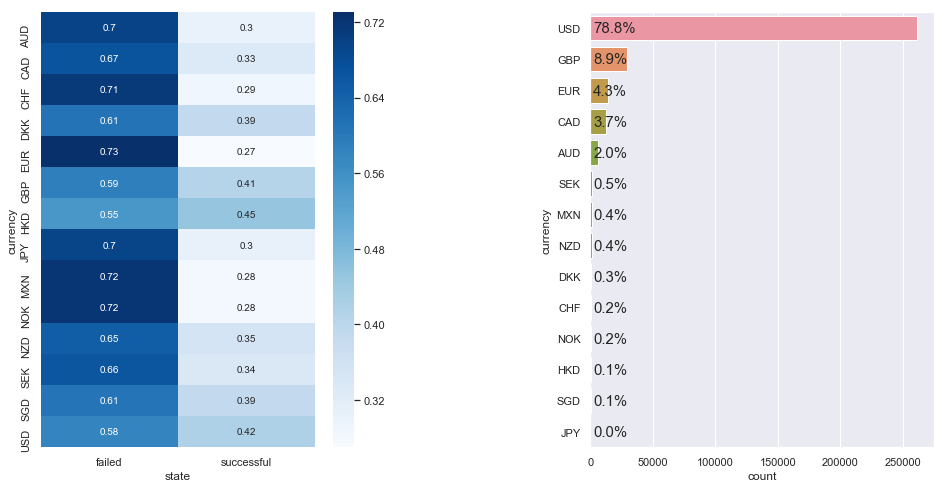

In [15]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.subplots_adjust(wspace=0.6, hspace=0.5)

# currency内の構成割合
perc_currency=df_data_succ_fail["currency"].value_counts(normalize=True)

# クロス集計
cross_curr=pd.crosstab(index=df_data_succ_fail["currency"],columns=df_data_succ_fail["state"],normalize='index')

# クロス集計の図示
sns.heatmap(cross_curr,annot=True,cmap="Blues",ax=ax[0])

# currency別のカウントプロット
sns.countplot(y=df_data_succ_fail.currency,
             order=df_data_succ_fail["currency"].value_counts().index,
             ax=ax[1])

# 構成割合をグラフ上に表示
for x in range(0,len(perc_currency)):
    plt.text(2500, x+0.15, "{:.1f}%".format(perc_currency[x]*100), fontsize=15, fontfamily="Arial")

plt.show()

* currency別としては,USD(米国ドル):78.8%,GBP(英国ドル):8.9%,CAD(カナダドル):3.7%,country別同様の順位
* 成功率はHKD(香港ドル):45%,USD(米国ドル):42%,GBP(英国ドル):41%の順
* 香港ドルが高い成功率を示すが,country別同様占める割合が小さいため有用とは正確に言えない

### 2-3. main_categoryとstate

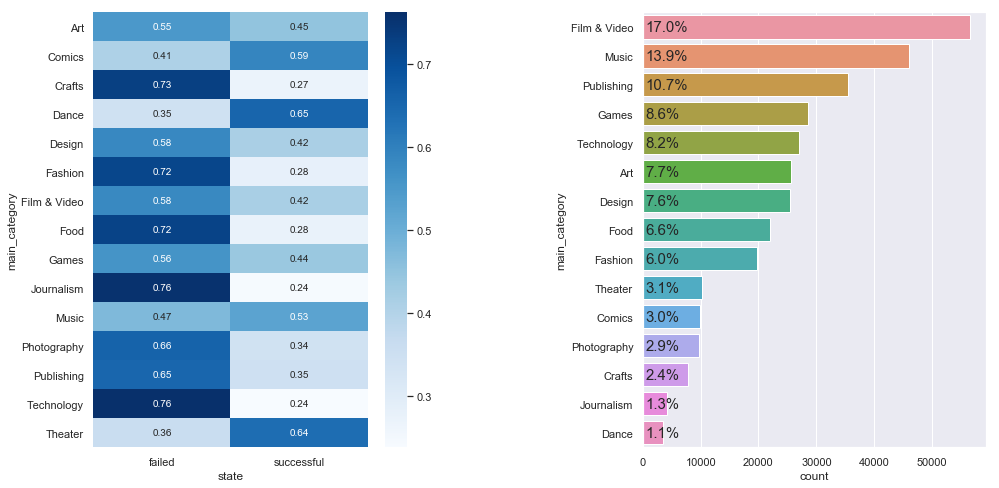

In [16]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.subplots_adjust(wspace=0.6, hspace=0.5)

# main_category内の構成割合
perc_main_category=df_data_succ_fail["main_category"].value_counts(normalize=True)

# クロス集計
cross_curr=pd.crosstab(index=df_data_succ_fail["main_category"],
                       columns=df_data_succ_fail["state"],
                       normalize='index')

# クロス集計の図示

sns.heatmap(cross_curr,annot=True,cmap="Blues",ax=ax[0])

# main_category別のカウントプロット
sns.countplot(y=df_data_succ_fail.main_category,
              order=df_data_succ_fail["main_category"].value_counts().index,
              ax=ax[1])

# 構成割合をグラフ上に表示
for x in range(0,len(perc_main_category)):
    plt.text(500, x+0.15, "{:.1f}%".format(perc_main_category[x]*100),
            fontsize=15, fontfamily="Arial")
    
plt.show()

* main_category別としては,Film&Video:17.0%(42%),Music:13.9%(53%),Publishing:10.7%(35%)※()内は成功率
* 成功率としては,Dance:65%,Theater:64%,Comics:59%の順
* 成功率の高さにも関わらず、構成割合が少ない

### 2-4. 不要な変数の削除2

In [17]:
# currency, countryの種類
print("currencyの種類：{}".format(len(np.unique(df_data_R1.currency))))
print("countryの種類：{}".format(len(np.unique(df_data_R1.country))))

currencyの種類：14
countryの種類：23


* **country**:  currency(14)があるため,country(23)は削除.加えて,2-1と2-2より似た傾向を持つため.

In [18]:
df_data_succ_fail = df_data_succ_fail.drop('country',axis=1)

### 2-5. usd_goal_realの外観

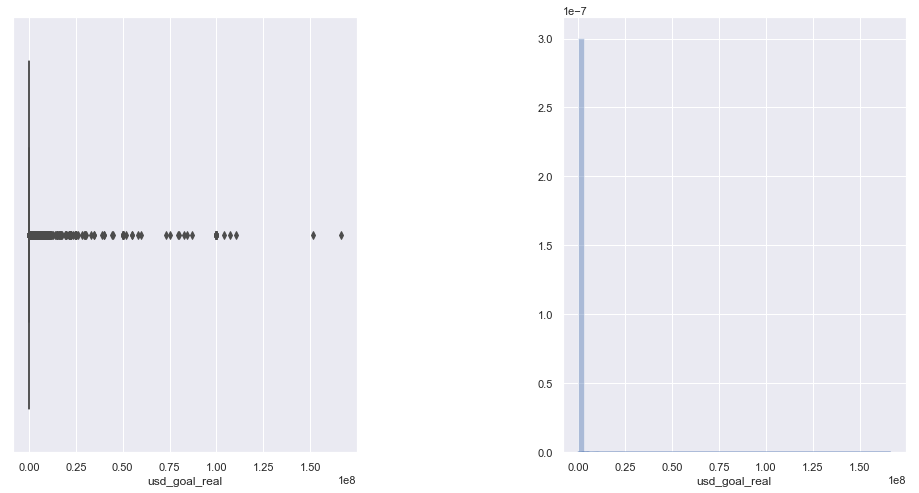

count    3.316750e+05
mean     4.151000e+04
std      1.108930e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64


In [19]:
# usd_goal_realの箱ひげ図とヒストグラムの図示
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.subplots_adjust(wspace=0.6, hspace=0.5)
sns.boxplot(df_data_succ_fail.usd_goal_real,ax=ax[0])
sns.distplot(df_data_succ_fail.usd_goal_real,ax=ax[1])
plt.show()

# usd_goal_realの統計量
print(df_data_succ_fail['usd_goal_real'].describe())

* 最小値:0.01ドル,最大値:1億6千万ドル以上,平均:5000ドル
* 箱ひげ図とヒストグラムの結果がつぶれて見えないため，外れ値処理を行う(3-3.)

### 2-6. 日時データの外観
datetime型に変換し、差の日数を出す  
不必要となったdeadlineとlaunchedの列を消す  
period：募集期間（締め切りー開始）（日数）

In [20]:
import datetime

In [21]:
# 開始日と締め切り日をdatetime型に変換
df_data_succ_fail['deadline'] = pd.to_datetime(df_data_succ_fail['deadline'],errors = 'coerce')
df_data_succ_fail['launched'] = pd.to_datetime(df_data_succ_fail['launched'],errors = 'coerce')

# period(募集期間)
df_data_succ_fail['period'] = (df_data_succ_fail['deadline'] - df_data_succ_fail['launched']).dt.days

# 開始日と締め切り日の列を削除
df_data_succ_fail = df_data_succ_fail.drop(['deadline', 'launched'], axis=1)

count    331675.000000
mean         32.954902
std          12.713329
min           0.000000
25%          29.000000
50%          29.000000
75%          35.000000
max          91.000000
Name: period, dtype: float64


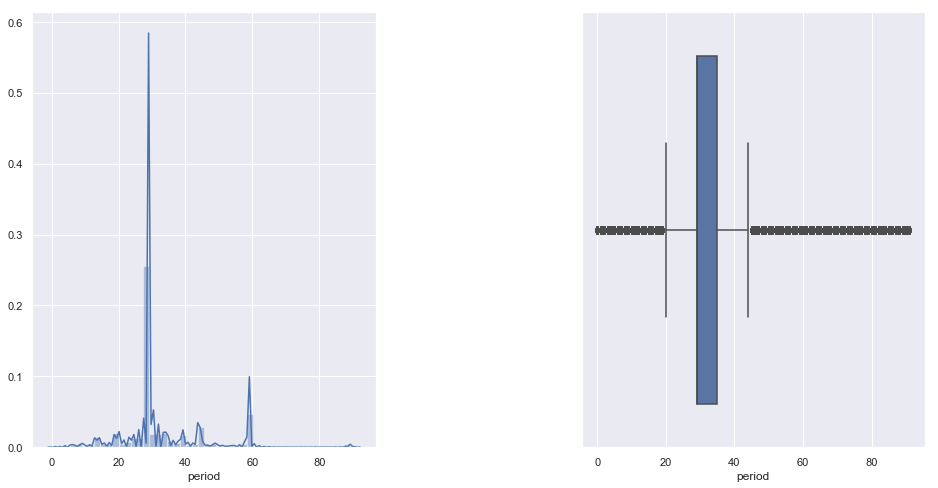

In [22]:
# 募集期間のヒストグラムと箱ひげ図
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.subplots_adjust(wspace=0.6, hspace=0.5)
sns.distplot(df_data_succ_fail.period,ax=ax[0])
sns.boxplot(df_data_succ_fail.period,ax=ax[1])

# 募集期間の統計量
print(df_data_succ_fail['period'].describe())

* 主に募集期間は30日間程度。特に外れ値処理は必要なし

## 3. 前処理

### 3-1. 目的変数(state)の処理

In [23]:
# successfulとfailed以外を除いたデータに対して、successful:1,failed:0
df_data_succ_fail.loc[df_data_succ_fail['state']=='successful','state'] = 1
df_data_succ_fail.loc[df_data_succ_fail['state']=='failed','state'] = 0

### 3-2. トレーニングデータとテストデータに分割(8:2)

In [24]:
# stateをlabelとして目的変数に,その他をDataとして説明変数に
label = df_data_succ_fail["state"].values
Data = df_data_succ_fail.drop('state',axis=1).values
test_size=0.2
cols = list(df_data_succ_fail.drop('state',axis=1).columns)
# trainとtestに分割
train,test,label_train,label_test = train_test_split(Data,label,test_size=test_size,random_state=1234)
df_train = pd.DataFrame(train,columns=cols)
df_test = pd.DataFrame(test,columns=cols)

### 3-3. usd_goal_realの前処理
2-4. usd_goal_realの外観から,箱ひげ図がつぶれているかつヒストグラムがガウス分布でないため,外れ値を四分位範囲を利用して検出する  　

**Q1:第１四分位数(25%),Q3:第３四分位数(75%)  
四分位範囲(IQR)：Q3-Q1  
外れ値下側：Q1-IQR×1.5  
外れ値上側：Q3+IQR×1.5**

In [25]:
# 分位点計算
Q1,Q3 = np.percentile(df_train.usd_goal_real,[25,75])
IQR = Q3-Q1
lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5
print(lower_bound,upper_bound)

-17500.0 34500.0


* 下側は最小0.01ドルのため，外れ値処理なし
* 上側は34500ドル以上のデータを外れ値として削除

In [26]:
df_train['label_train'] = label_train

In [27]:
# 外れ値データの削除
df_train_iqr = df_train[df_train["usd_goal_real"] <= upper_bound]

### 3-4. ダミー変数への変換
ダミー変数を用いて文字列データを数値データに変換  
**main_category, currency**

In [28]:
# トレーニングデータの中身確認
df_train_iqr

,main_category,currency,usd_goal_real,period,label_train
0,Journalism,USD,1000,44,0
1,Film & Video,MXN,2502.16,59,1
2,Art,CAD,3537.03,39,0
3,Journalism,USD,4000,29,1
4,Design,USD,20000,29,1
5,Music,USD,820,29,0
6,Design,USD,5000,44,0
7,Technology,USD,13500,33,0
8,Art,GBP,12037.9,13,0
9,Film & Video,CAD,6020.47,20,0


In [29]:
# ダミー変数への変換
df_dummys_train = pd.get_dummies(df_train_iqr[['main_category','currency']])
df_dummys_test = pd.get_dummies(df_test[['main_category','currency']])

# main_category,currency, countryのデータを削除し,ダミー変数を結合
label_train = df_train_iqr['label_train']
df_train_iqr_dummys = pd.concat([df_train_iqr.drop(columns=['main_category','currency','label_train']),df_dummys_train],axis=1)
df_test_dummys =  pd.concat([df_test.drop(columns=['main_category','currency']),df_dummys_test],axis=1)

# ダミー変数返還後の列名
cols = list(df_train_iqr_dummys.columns)

In [30]:
# ダミー変数変換後のデータの確認
df_train_iqr_dummys

,usd_goal_real,period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000,44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2502.16,59,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3537.03,39,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20000,29,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,820,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,5000,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,13500,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,12037.9,13,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,6020.47,20,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 4. 標準化と相関  
トレーニングとテストデータに対して標準化を行う  
相関係数を用いてデータ間の相関を見る

### 4-1. 標準化

In [31]:
# 標準化
stdsc = StandardScaler()
Scaled_train = stdsc.fit_transform(df_train_iqr_dummys)
Scaled_test = stdsc.fit_transform(df_test_dummys)

# データフレーム
df_Scaled_train = pd.DataFrame(Scaled_train,columns=cols)
df_Scaled_test = pd.DataFrame(Scaled_test,columns=cols)

C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 4-2. 相関係数

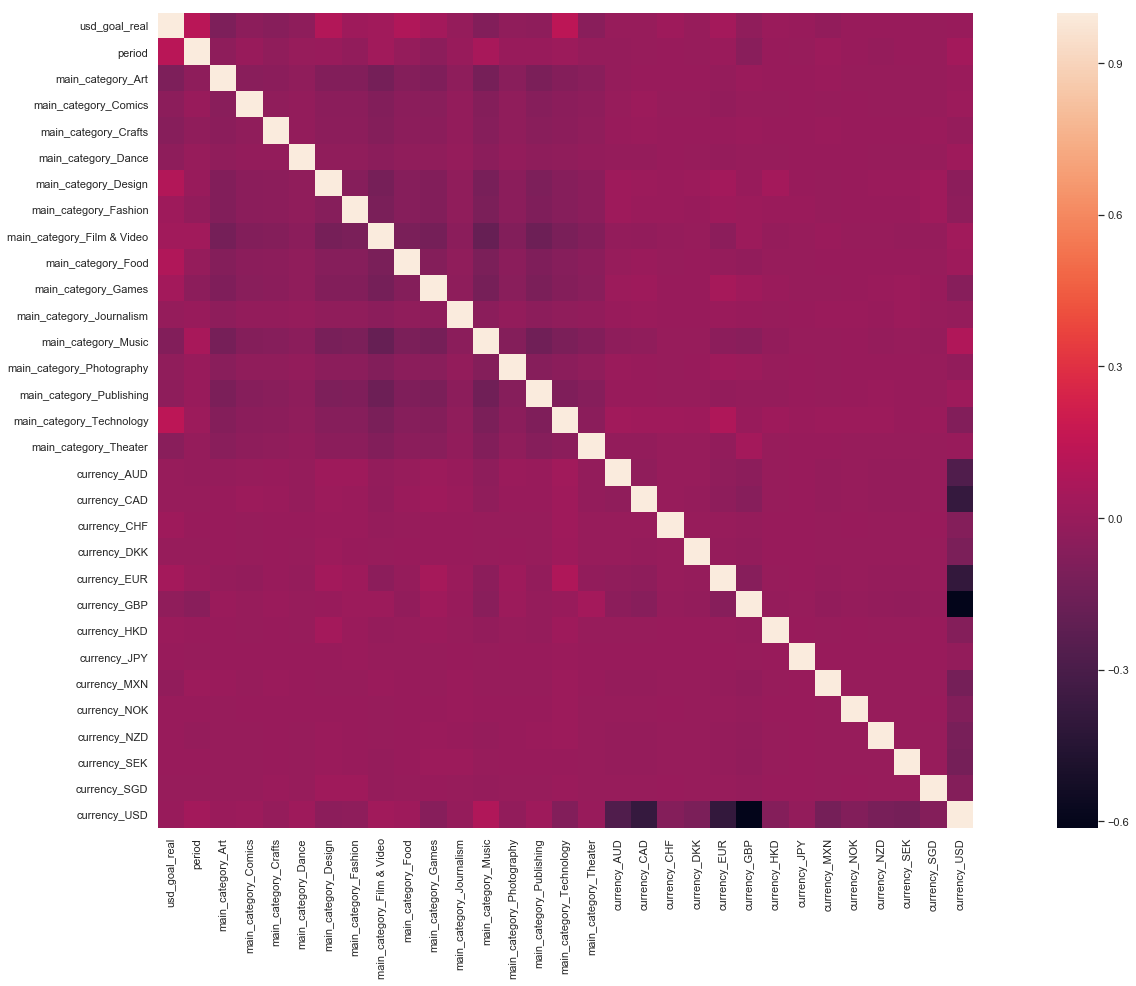

In [32]:
# 相関係数
corr = df_Scaled_train.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,
            square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [33]:
# 相関係数が0.9以上の変数の数
df_bool = (corr >= 0.9)
df_bool.sum()

usd_goal_real                 1
period                        1
main_category_Art             1
main_category_Comics          1
main_category_Crafts          1
main_category_Dance           1
main_category_Design          1
main_category_Fashion         1
main_category_Film & Video    1
main_category_Food            1
main_category_Games           1
main_category_Journalism      1
main_category_Music           1
main_category_Photography     1
main_category_Publishing      1
main_category_Technology      1
main_category_Theater         1
currency_AUD                  1
currency_CAD                  1
currency_CHF                  1
currency_DKK                  1
currency_EUR                  1
currency_GBP                  1
currency_HKD                  1
currency_JPY                  1
currency_MXN                  1
currency_NOK                  1
currency_NZD                  1
currency_SEK                  1
currency_SGD                  1
currency_USD                  1
dtype: i

* 説明変数間の相関係数が0.9以上の説明変数を調べたが,無いため削除無し

## 5. 特徴量選択

### 5-1. Lasso

In [34]:
# estimatorにモデルをセット
estimator = LassoCV(alphas=10 ** np.arange(-4, 1, 0.1), cv=5)

# 係数が1e-3以下である特徴を削除
sfm = SelectFromModel(estimator, threshold=1e-3)

# fitで特徴選択を実行
sfm.fit(Scaled_train, label_train)

SelectFromModel(estimator=LassoCV(alphas=array([1.00000e-04, 1.25893e-04, 1.58489e-04, 1.99526e-04, 2.51189e-04,
       3.16228e-04, 3.98107e-04, 5.01187e-04, 6.30957e-04, 7.94328e-04,
       1.00000e-03, 1.25893e-03, 1.58489e-03, 1.99526e-03, 2.51189e-03,
       3.16228e-03, 3.98107e-03, 5.01187e-03, 6.30957e-03, ...=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.001)

In [35]:
# Lassoにより選択された特徴量のみを抽出
df_Scaled_train_Lasso = df_Scaled_train.loc[:, sfm.get_support()]
df_Scaled_test_Lasso  = df_Scaled_test.loc[:,sfm.get_support()]

# 標準化無しのデータフレームに対しても同様
df_train_Lasso = df_train_iqr_dummys.loc[:,sfm.get_support()]
df_test_Lasso = df_test_dummys.loc[:,sfm.get_support()]

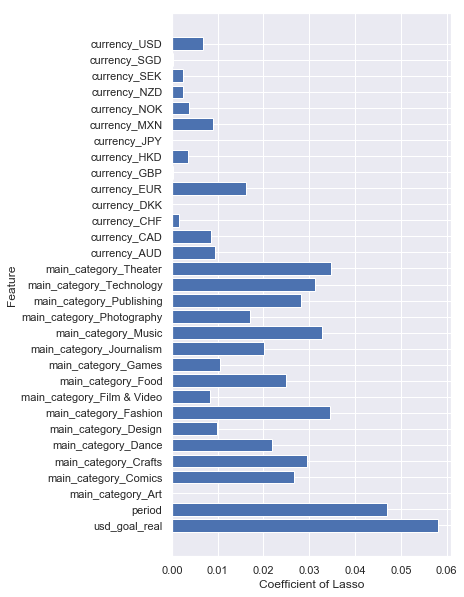

In [36]:
# 係数の絶対値を取得
abs_coef = np.abs(sfm.estimator_.coef_)

# 係数を棒グラフで表示
plt.figure(figsize=(5,10))
plt.barh(np.arange(0, len(abs_coef)), abs_coef, tick_label=df_Scaled_train.columns.values)
plt.xlabel("Coefficient of Lasso")
plt.ylabel("Feature")
plt.show()

###  5-2. Boruta(Random Forest + t-test)

In [37]:
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=4, max_depth=7)

# Boruta,two_step=FalseよりBonfferoni correlationを用いる
Boruta_selection = BorutaPy(rf, n_estimators='auto', two_step=False,verbose=True, random_state=1234)
Boruta_selection.fit(Scaled_train,label_train)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100


BorutaPy finished running.

Iteration: 	46 / 100
Confirmed: 	15
Tentative: 	0
Rejected: 	16


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=4,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x000002BE000B7C18>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x000002BE000B7C18>,
     two_step=False, verbose=True)

In [39]:
# Borutaにより選択された特徴量
df_Scaled_train.columns[Boruta_selection.support_]

Index(['usd_goal_real', 'period', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Fashion',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Publishing',
       'main_category_Technology', 'main_category_Theater', 'currency_EUR',
       'currency_USD'],
      dtype='object')

In [40]:
# Borutaにより選択された特徴量のみ抽出
df_Scaled_train_Boruta= df_Scaled_train.iloc[:,Boruta_selection.support_]
df_Scaled_test_Boruta = df_Scaled_test.iloc[:,Boruta_selection.support_]

# 標準化無しのデータフレームに対しても同様
df_train_Boruta = df_train_iqr_dummys.iloc[:,Boruta_selection.support_]
df_test_Boruta = df_test_dummys.iloc[:,Boruta_selection.support_]

### 5-3. PCA

,0
PC1,6.146138e-02
PC2,4.364667e-02
PC3,3.906943e-02
PC4,3.753490e-02
PC5,3.636698e-02
PC6,3.549852e-02
PC7,3.533702e-02
PC8,3.486591e-02
PC9,3.475477e-02
PC10,3.465404e-02


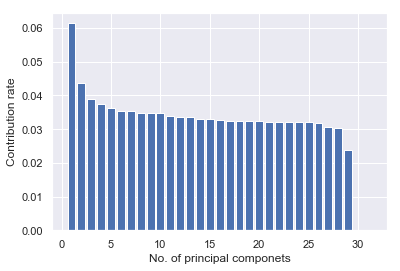

In [41]:
# 主成分分析の実装
from sklearn.decomposition import PCA
pca = PCA(n_components=len(df_Scaled_train.columns))
pca.fit(df_Scaled_train)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
plt.xlabel("No. of principal componets")
plt.ylabel("Contribution rate")

# 各主成分にによる寄与率を表示
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df_Scaled_train.columns))])

,0
PC1,0.061461
PC2,0.105108
PC3,0.144177
PC4,0.181712
PC5,0.218079
PC6,0.253578
PC7,0.288915
PC8,0.323781
PC9,0.358536
PC10,0.393190


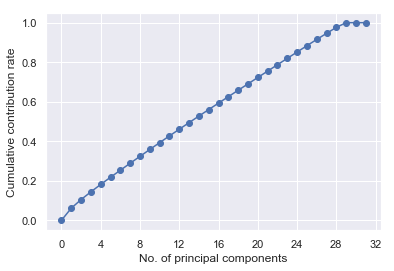

In [42]:
# 累積寄与率のデータとプロット
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("No. of principal components")
plt.ylabel("Cumulative contribution rate")
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), index=["PC{}".format(x + 1) for x in range(len(df_Scaled_train.columns))])

* 各PCの寄与率それぞれは小さい
* PCAの結果より、累積寄与率が80%以上のPC23までを特徴量として用いる

In [43]:
# データを主成分空間へ
feature_train = pca.transform(df_Scaled_train)
df_Scaled_train_PCA = pd.DataFrame(feature_train, columns=["PC{}".format(x + 1) for x in range(len(df_Scaled_train.columns))])

# PC23までを特徴量として抽出
df_Scaled_train_PCA_23 = df_Scaled_train_PCA.iloc[:,0:23]

# テストデータに対しても同様
feature_test = pca.transform(df_Scaled_test)
df_Scaled_test_PCA= pd.DataFrame(feature_test, columns=["PC{}".format(x + 1) for x in range(len(df_Scaled_test.columns))])
df_Scaled_test_PCA_23 = df_Scaled_test_PCA.iloc[:,0:23]

## 6. 機械学習モデルの検証

In [44]:
# 混合行列の図示と評価指標の関数定義

# 混合行列の図示
def plot_cmx(y_true,y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    pd.options.display.float_format = '{:.4g}'.format
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    plt.figure(figsize = (10,5))
    sns.heatmap(df_cmx, annot=True)
    plt.show()

# 評価指標
def evaluation(y_true,y_pred):
    # Accuracy
    accuracy=accuracy_score(y_true,y_pred)
    print("Accuracy = {:.3f}%".format(accuracy*100))
    
    # Precision, Recall, F1-score
    precision,recall,F1,_=precision_recall_fscore_support(y_true,y_pred)
    print("Precision = {:.3f}%".format(precision[0]*100))
    print("Recall = {:.3f}%".format(recall[0]*100))
    print("F1 = {:.3f}%".format(F1[0]*100))
    return accuracy*100, precision*100, recall*100, F1*100

### 6-1. Logistic regression

In [45]:
# ハイパーパラメータ
param_grid = {
    'loss': ['log','hinge'],
    'penalty': ['elasticnet'],
    'alpha':  [1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1,10],
    'l1_ratio': np.linspace(0,1,10)}

# グリッドサーチの実装
GS_lr=GridSearchCV(estimator=SGDClassifier(random_state=1234),
                     param_grid=param_grid,
                     scoring="accuracy",
                     verbose=True,
                     cv=5,
                     n_jobs=11)

#### 6-1-1. Lasso

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    4.4s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:   15.6s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:   34.3s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:   59.8s
[Parallel(n_jobs=11)]: Done 800 out of 800 | elapsed:  1.0min finished
C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


特徴量選択：Lasso
トレーニングの正解率:62.537%
最適パラメータ:SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.0, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


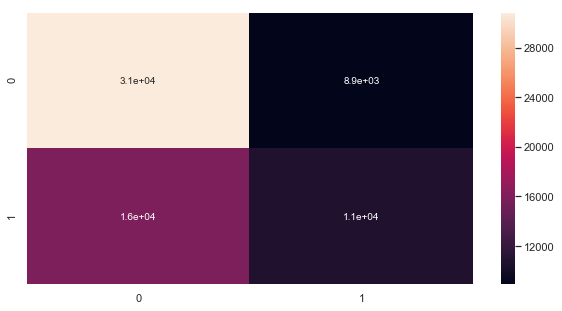

Accuracy = 62.661%
Precision = 66.017%
Recall = 77.625%
F1 = 71.352%


In [46]:
# 特徴量選択：Lasso
GS_lr.fit(df_Scaled_train_Lasso,label_train)
print("特徴量選択：Lasso")
LR_Lasso_accu_train = GS_lr.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_lr.best_score_*100))
print("最適パラメータ:{}".format(GS_lr.best_estimator_))

# グリッドサーチによるベストモデルを適応
model = GS_lr.best_estimator_
model.fit(df_Scaled_train_Lasso,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_Lasso)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
LR_Lasso_accu, LR_Lasso_prec, LR_Lasso_recall, LR_Lasso_F1 = evaluation(label_test,test_pred)

#### 6-1-2. Boruta

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    1.8s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:   10.9s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:   25.5s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:   44.3s
[Parallel(n_jobs=11)]: Done 800 out of 800 | elapsed:   45.3s finished
C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


特徴量選択：Boruta
トレーニングの正解率:62.282%
最適パラメータ:SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.0, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


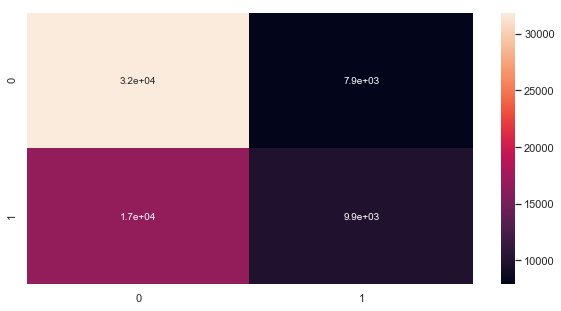

Accuracy = 62.928%
Precision = 65.582%
Recall = 80.205%
F1 = 72.160%


In [47]:
# 特徴量選択：Boruta
GS_lr.fit(df_Scaled_train_Boruta,label_train)
print("特徴量選択：Boruta")
LR_Boruta_accu_train = GS_lr.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_lr.best_score_*100))
print("最適パラメータ:{}".format(GS_lr.best_estimator_))

# グリッドサーチによるベストモデルを適応
model=GS_lr.best_estimator_
model.fit(df_Scaled_train_Boruta,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_Boruta)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
LR_Boruta_accu, LR_Boruta_prec, LR_Boruta_recall, LR_Boruta_F1 = evaluation(label_test,test_pred)

#### 6-1-3. PCA

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    2.5s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:   13.9s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:   31.9s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:   56.3s
[Parallel(n_jobs=11)]: Done 800 out of 800 | elapsed:   57.7s finished
C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


特徴量選択：PCA
トレーニングの正解率:61.858%
最適パラメータ:SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.1111111111111111, learning_rate='optimal', loss='log',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='elasticnet', power_t=0.5, random_state=1234, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


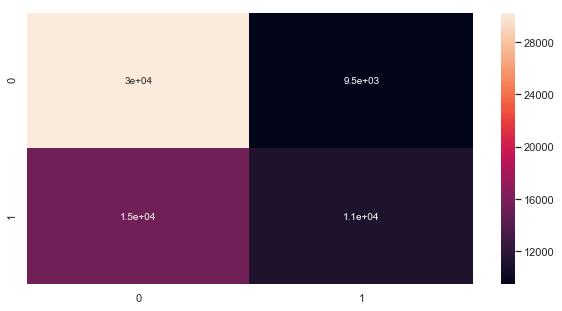

Accuracy = 62.410%
Precision = 66.176%
Recall = 76.193%
F1 = 70.833%


In [48]:
# 特徴量選択：PCA
GS_lr.fit(df_Scaled_train_PCA_23,label_train)
print("特徴量選択：PCA")
LR_PCA_accu_train = GS_lr.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_lr.best_score_*100))
print("最適パラメータ:{}".format(GS_lr.best_estimator_))

# グリッドサーチによるベストモデルを適応
model=GS_lr.best_estimator_
model.fit(df_Scaled_train_PCA_23,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_PCA_23)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
LR_PCA_accu, LR_PCA_prec, LR_PCA_recall, LR_PCA_F1 = evaluation(label_test,test_pred)

### 6-2. Random Forest

In [49]:
# ハイパーパラメータ
param_grid={'n_estimators':[100,500,1000],
            'max_depth':range(1,3,1),
            'criterion':["gini","entropy"]}

# グリッドサーチの実装
GS_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
                   param_grid=param_grid,
                   scoring="accuracy",
                   verbose=True,
                   cv=5,
                   n_jobs=11)

#### 6-2-1. Lasso

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done  60 out of  60 | elapsed:  5.8min finished


特徴量選択：Lasso
トレーニングの正解率:58.696%
最適パラメータ:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)


C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


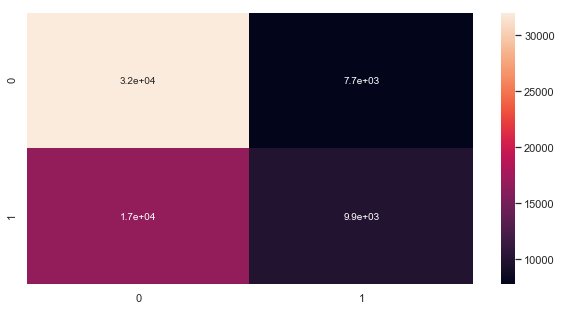

Accuracy = 63.191%
Precision = 65.742%
Recall = 80.504%
F1 = 72.378%


In [50]:
#  特徴量選択：Lasso
GS_rf.fit(df_Scaled_train_Lasso,label_train)
print("特徴量選択：Lasso")
RF_Lasso_accu_train = GS_rf.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_rf.best_score_*100))
print("最適パラメータ:{}".format(GS_rf.best_estimator_))

# グリッドサーチによるベストモデルを適応
#model=GS_rf.best_estimator_
model.fit(df_Scaled_train_Lasso,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_Lasso)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
RF_Lasso_accu, RF_Lasso_prec, RF_Lasso_recall, RF_Lasso_F1 = evaluation(label_test,test_pred)

#### 6-2-2. Boruta

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=11)]: Done  60 out of  60 | elapsed:  5.0min finished


特徴量選択：Boruta
トレーニングの正解率:58.491%
最適パラメータ:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)


C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


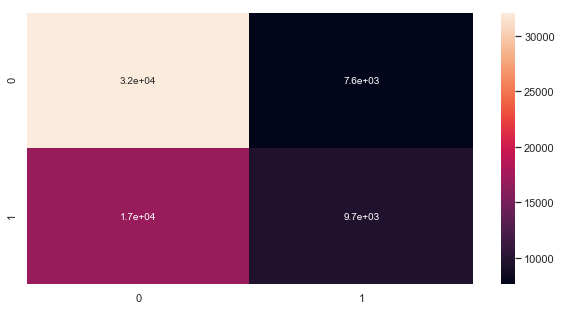

Accuracy = 63.000%
Precision = 65.492%
Recall = 80.816%
F1 = 72.352%


In [51]:
# 特徴量選択：Boruta
GS_rf.fit(df_Scaled_train_Boruta,label_train)
print("特徴量選択：Boruta")
RF_Boruta_accu_train = GS_rf.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_rf.best_score_*100))
print("最適パラメータ:{}".format(GS_rf.best_estimator_))

# グリッドサーチによるベストモデルを適応
model.fit(df_Scaled_train_Boruta,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_Boruta)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
RF_Boruta_accu, RF_Boruta_prec, RF_Boruta_recall, RF_Boruta_F1 = evaluation(label_test,test_pred)

#### 6-2-3. PCA

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:  3.4min
[Parallel(n_jobs=11)]: Done  60 out of  60 | elapsed: 10.0min finished


# 特徴量選択：PCA
トレーニングの正解率:59.871%
最適パラメータ:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)


C:\Users\Ariken\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


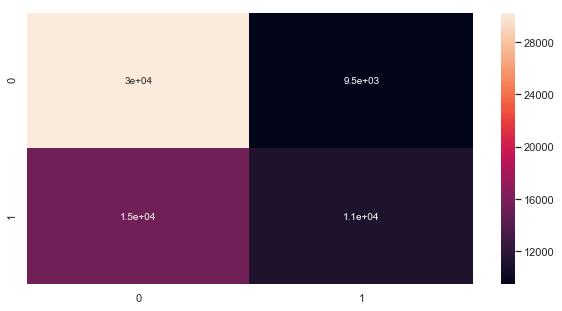

Accuracy = 62.410%
Precision = 66.176%
Recall = 76.193%
F1 = 70.833%


In [52]:
# 特徴量選択：PCA
GS_rf.fit(df_Scaled_train_PCA_23,label_train)
print("# 特徴量選択：PCA")
RF_PCA_accu_train = GS_rf.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_rf.best_score_*100))
print("最適パラメータ:{}".format(GS_rf.best_estimator_))

# グリッドサーチによるベストモデルを適応
model.fit(df_Scaled_train_PCA_23,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_PCA_23)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
RF_PCA_accu, RF_PCA_prec, RF_PCA_recall, RF_PCA_F1 = evaluation(label_test,test_pred)

### 6-3. AdaBoost

In [53]:
# ハイパーパラメータ
params={'max_depth':range(1,4,1),
            'criterion':["gini","entropy"]}


# グリッドサーチの実装
Ada = AdaBoostClassifier(n_estimators=100,random_state=1234)
param_grid = {"base_estimator":[DecisionTreeClassifier(max_depth=4,random_state=1234)],
             "learning_rate":[0.5,1.0,2.0]}
GS_ada=GridSearchCV(estimator=Ada,
                    param_grid=param_grid,
                    scoring="accuracy",
                    verbose=True,
                    cv=5,
                    n_jobs=11)

#### 6-3-1. Lasso

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  10 out of  15 | elapsed:  1.4min remaining:   40.5s
[Parallel(n_jobs=11)]: Done  15 out of  15 | elapsed:  1.9min finished


特徴量選択：Lasso
トレーニングの正解率:64.393%
最適パラメータ:AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=1234)


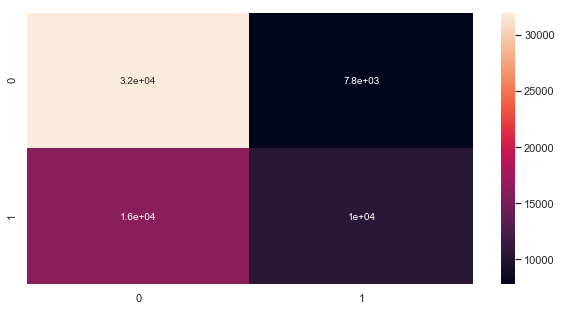

Accuracy = 64.010%
Precision = 66.503%
Recall = 80.434%
F1 = 72.808%


In [54]:
#  特徴量選択：Lasso
GS_ada.fit(df_Scaled_train_Lasso,label_train)    
print("特徴量選択：Lasso")
Ada_Lasso_accu_train = GS_ada.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_ada.best_score_*100))
print("最適パラメータ:{}".format(GS_ada.best_estimator_))

# グリッドサーチによるベストモデルを適応
model=GS_ada.best_estimator_
model.fit(df_Scaled_train_Lasso,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_Lasso)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
Ada_Lasso_accu, Ada_Lasso_prec, Ada_Lasso_recall, Ada_Lasso_F1 = evaluation(label_test,test_pred)   

#### 6-3-2. Boruta

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  10 out of  15 | elapsed:  1.0min remaining:   31.3s
[Parallel(n_jobs=11)]: Done  15 out of  15 | elapsed:  1.4min finished


特徴量選択：Boruta
トレーニングの正解率:0.642%
最適パラメータ:AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=1234)


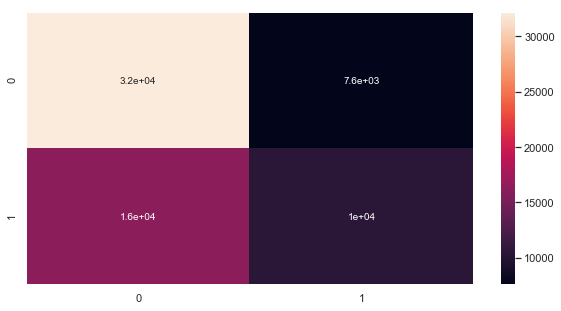

Accuracy = 63.999%
Precision = 66.376%
Recall = 80.867%
F1 = 72.908%


In [55]:
#  特徴量選択：Boruta
GS_ada.fit(df_Scaled_train_Boruta,label_train)   
print("特徴量選択：Boruta")
Ada_Boruta_accu_train = GS_ada.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_ada.best_score_))
print("最適パラメータ:{}".format(GS_ada.best_estimator_))

# グリッドサーチによるベストモデルを適応
model=GS_ada.best_estimator_
model.fit(df_Scaled_train_Boruta,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_Boruta)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
Ada_Boruta_accu, Ada_Boruta_prec, Ada_Boruta_recall, Ada_Boruta_F1 = evaluation(label_test,test_pred)   

#### 6-3-3. PCA

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  10 out of  15 | elapsed:  4.1min remaining:  2.1min
[Parallel(n_jobs=11)]: Done  15 out of  15 | elapsed:  6.4min finished


特徴量選択：PCA
トレーニングの正解率:0.635%
最適パラメータ:AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=1234)


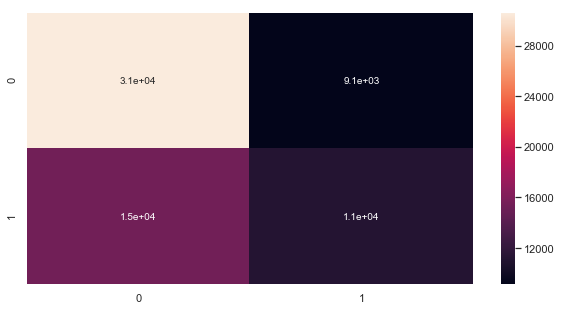

Accuracy = 63.030%
Precision = 66.531%
Recall = 77.039%
F1 = 71.401%


In [56]:
#  特徴量選択：PCA
GS_ada.fit(df_Scaled_train_PCA_23,label_train)    
print("特徴量選択：PCA")
Ada_PCA_accu_train = GS_ada.best_score_*100
print("トレーニングの正解率:{:.3f}%".format(GS_ada.best_score_))
print("最適パラメータ:{}".format(GS_ada.best_estimator_))

# グリッドサーチによるベストモデルを適応
model=GS_ada.best_estimator_
model.fit(df_Scaled_train_PCA_23,label_train)

# テストデータの予測
test_pred=model.predict(df_Scaled_test_PCA_23)

# 混合行列の表示
plot_cmx(label_test,test_pred)

# 評価指標の実装
Ada_PCA_accu, Ada_PCA_prec, Ada_PCA_recall, Ada_PCA_F1 = evaluation(label_test,test_pred)   

## 7. まとめ
**LR: Logistic Regression  
RF: Random Forest   
Ada: AdaBoost**

In [83]:
# 結果のまとめの表(%表示)
result_columns = ["Train_accuracy","Test_accuracy","Test_precision","Test_recall","Test_F1"]
result_rows = ["LR_Lasso","LR_Boruta","LR_PCA",
               "RF_Lasso","RF_Boruta","RF_PCA",              
               "Ada_Lasso","Ada_Boruta","Ada_PCA"]
result_list = [[LR_Lasso_accu_train,  LR_Lasso_accu,  LR_Lasso_prec[0],  LR_Lasso_recall[0],  LR_Lasso_F1[0]],
               [LR_Boruta_accu_train, LR_Boruta_accu, LR_Boruta_prec[0], LR_Boruta_recall[0], LR_Boruta_F1[0]],
               [LR_PCA_accu_train,    LR_PCA_accu,    LR_PCA_prec[0],    LR_PCA_recall[0],    LR_PCA_F1[0]],
               [RF_Lasso_accu_train,  RF_Lasso_accu,  RF_Lasso_prec[0],  RF_Lasso_recall[0],  RF_Lasso_F1[0]],
               [RF_Boruta_accu_train, RF_Boruta_accu, RF_Boruta_prec[0], RF_Boruta_recall[0], RF_Boruta_F1[0]],
               [RF_PCA_accu_train,    RF_PCA_accu,    RF_PCA_prec[0],    RF_PCA_recall[0],    RF_PCA_F1[0]],                       
               [Ada_Lasso_accu_train, Ada_Lasso_accu, Ada_Lasso_prec[0], Ada_Lasso_recall[0], Ada_Lasso_F1[0]],
               [Ada_Boruta_accu_train,Ada_Boruta_accu,Ada_Boruta_prec[0],Ada_Boruta_recall[0],Ada_Boruta_F1[0]],
               [Ada_PCA_accu_train,   Ada_PCA_accu,   Ada_PCA_prec[0],   Ada_PCA_recall[0],   Ada_PCA_F1[0]]]
pd.DataFrame(result_list,index=result_rows,columns=result_columns)

,Train_accuracy,Test_accuracy,Test_precision,Test_recall,Test_F1
LR_Lasso,62.54,62.66,66.02,77.63,71.35
LR_Boruta,62.28,62.93,65.58,80.2,72.16
LR_PCA,61.86,62.41,66.18,76.19,70.83
RF_Lasso,58.7,63.19,65.74,80.5,72.38
RF_Boruta,58.49,63,65.49,80.82,72.35
RF_PCA,59.87,62.41,66.18,76.19,70.83
Ada_Lasso,64.39,64.01,66.5,80.43,72.81
Ada_Boruta,64.19,64,66.38,80.87,72.91
Ada_PCA,63.5,63.03,66.53,77.04,71.4


* accuracyより,Lassoより選択された特徴量を用いたAdaBoostがトレーニング:64.39%,テスト:64.01%で最も良い結果であった.

## 8. 考察
**全体を通して,トレーニングもテストもaccuracyが60%程度で結果が悪かった.要因は2つあると考える.**
1. 特徴量が少ない  
元々知りえない変数を削除することにより,15→4に. ダミー変数化により31個まで増やしたが,それでも少なかった.  
自身で作成した特徴量はperiod(募集期間)のみであった. より特徴量をデータから考えて作成する必要があった.  
main_category内からLassoやBorutaで10個程度選ばれていた. main_category内でも新しくグループ（カテゴリー）を作成することで結果を向上させる可能性があった.  
不要な変数として4つ削除したが,有意な特徴量が含まれている可能性もある.安易に削除せず,グループを作るなどするべきであった.  

2. ハイパーパラメータの調整  
特徴量選択手法3つ,機械学習モデル3つより9パターンの機械学習を行った.ハイパーパラメータについて計算時間を考慮して,少なめで調整した.ハイパーパラメータの調整をより増やすなどすることで結果が向上すると考えられる.  

また,追加でSVMを試した際ハイパーパラメータの調整やグリッドサーチの有無を試したが,計算時間が他の機械学習モデルと比較して大量にかかり計算を終えることが出来なかった.ハイパーパラメータの数だけでなく,データの数が多い場合にSVMは向いていないモデルだと感じた.このことから,計算の高速化を考えることも必要であった.


## 9. 参考文献
Boruta: https://github.com/scikit-learn-contrib/boruta_py
        